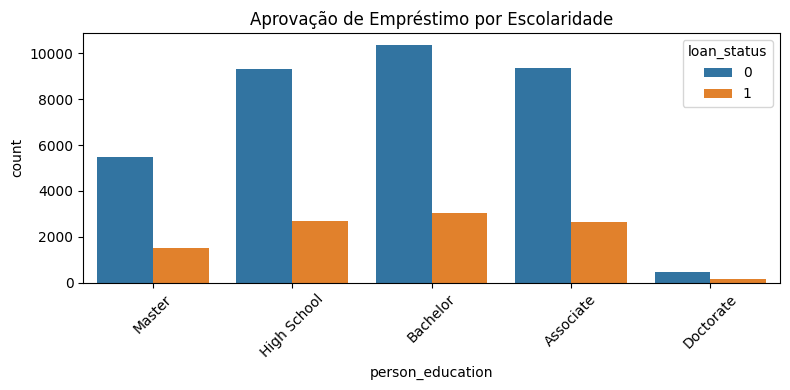

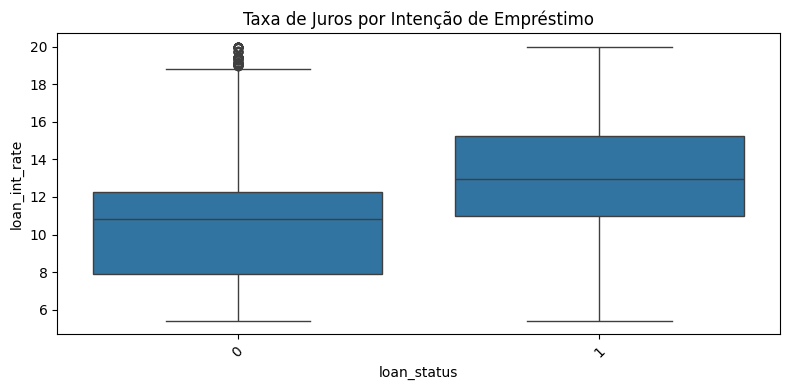

(person_age                        0
 person_gender                     0
 person_education                  0
 person_income                     0
 person_emp_exp                    0
 person_home_ownership             0
 loan_amnt                         0
 loan_intent                       0
 loan_int_rate                     0
 loan_percent_income               0
 cb_person_cred_hist_length        0
 credit_score                      0
 previous_loan_defaults_on_file    0
 loan_status                       0
 dtype: int64,
 np.int64(0))

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("loan_data.csv")

# Verificação de nulos e duplicados
nulos = df.isnull().sum()
duplicados = df.duplicated().sum()

# Primeira pergunta: Qual a relação entre nível de escolaridade e aprovação de empréstimo?
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="person_education", hue="loan_status")
plt.title("Aprovação de Empréstimo por Escolaridade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Segunda pergunta: Como a intenção do empréstimo afeta a taxa de juros?
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="loan_status", y="loan_int_rate")
plt.title("Taxa de Juros por Intenção de Empréstimo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(nulos, duplicados)


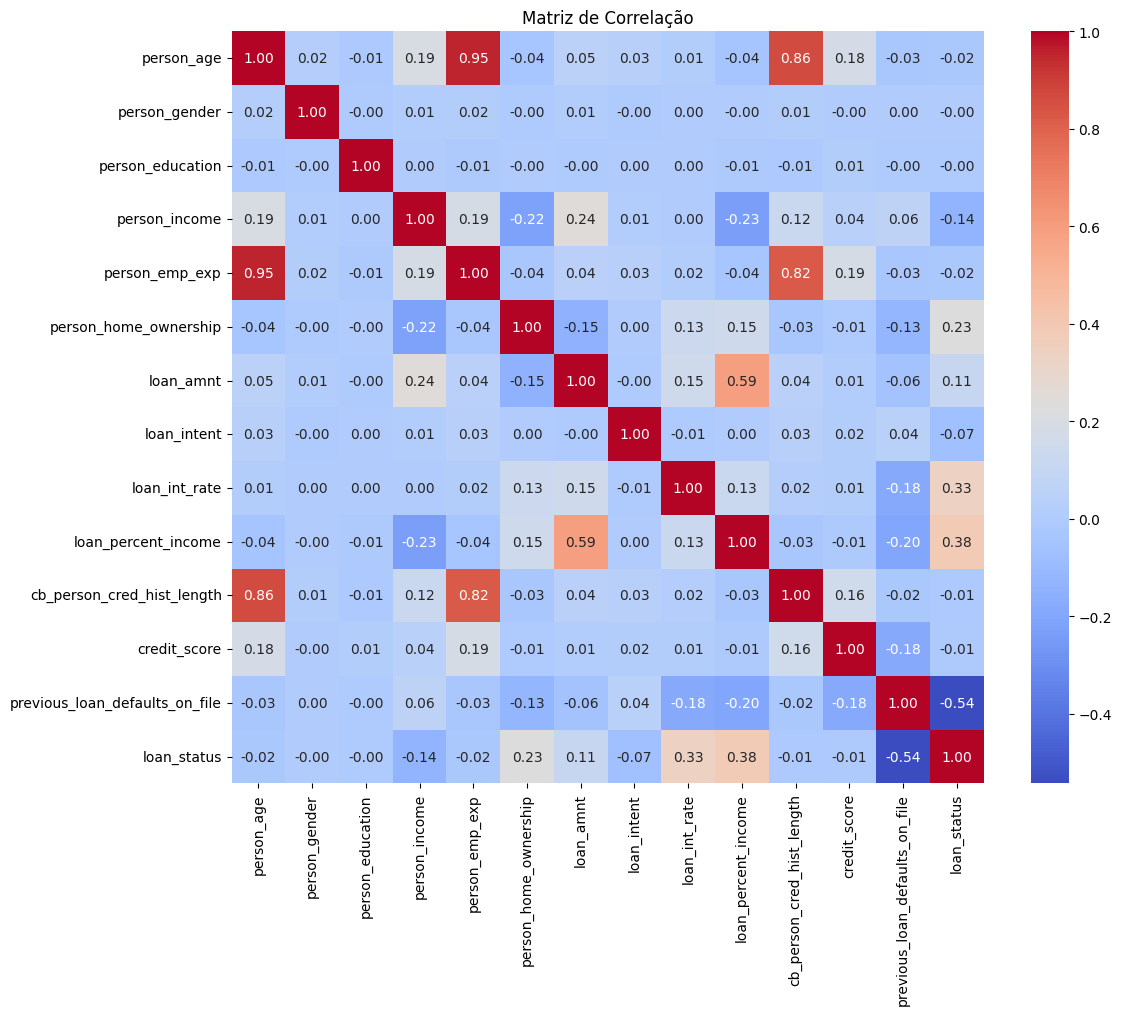

In [2]:
# Converter variáveis categóricas para análise de correlação
df_corr = df.copy()
categorical_cols = df_corr.select_dtypes(include='object').columns

# Encoding simples para análise de correlação
df_corr[categorical_cols] = df_corr[categorical_cols].astype("category").apply(lambda x: x.cat.codes)

# Matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import joblib

# Separar features e target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Separar colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# Pipeline de pré-processamento
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Imputar manualmente os valores faltantes nas variáveis categóricas
for col in categorical_features:
    X[col] = X[col].astype(str)  # garantir que sejam strings
    X[col].fillna(X[col].mode()[0], inplace=True)  # imputação manual

# Novo transformer categórico, sem imputer
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])



preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Pipeline completo com RandomForest
clf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
clf_pipeline.fit(X_train, y_train)

# Avaliação
y_pred = clf_pipeline.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Exportar o modelo completo
joblib.dump(clf_pipeline, "./loan_approval_model.joblib")

report


/tmp/ipykernel_1417373/2177354809.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0], inplace=True)  # imputação manual
/tmp/ipykernel_1417373/2177354809.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

{'0': {'precision': 0.93758611187655,
  'recall': 0.9735336194563662,
  'f1-score': 0.9552217855137564,
  'support': 6990.0},
 '1': {'precision': 0.8938002296211252,
  'recall': 0.7746268656716417,
  'f1-score': 0.829957356076759,
  'support': 2010.0},
 'accuracy': 0.9291111111111111,
 'macro avg': {'precision': 0.9156931707488376,
  'recall': 0.874080242564004,
  'f1-score': 0.8925895707952577,
  'support': 9000.0},
 'weighted avg': {'precision': 0.9278072648395052,
  'recall': 0.9291111111111111,
  'f1-score': 0.9272460629394936,
  'support': 9000.0}}

In [4]:
pip install onnx==1.16.0


Note: you may need to restart the kernel to use updated packages.
